In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Task 1: EDA

## Raw Data

In [ ]:
df = pd.read_csv("../data/raw/raw_MC.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Understanding Data

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No **null values** found in any column!

# Task 2: Analysis Pipeline

## Cleaning Data

In [ ]:
df_cleaned = df.copy().drop(['sex','children','smoker','region'],axis=1)
df_cleaned

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


The columns 'sex', 'children', 'smoker', and 'region' were removed from the dataset because my research question solely focuses on the relationship between age, BMI and the charges of medical insurance. This helps in localising the focus of thhe research question and having onyl the required data to handle.

### Removing outliers

In [ ]:
df_cleaned = df_cleaned[df_cleaned['age'].between(20,40)]
df_cleaned = df_cleaned.sort_values(by='age')
df_cleaned

,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


By removing outliers, I have conslidated my data parallel to my research question, focusing only on the people aged between 20 and 40.

In [ ]:
df_cleaned.describe()

,age,bmi,charges
count,564.000000,564.000000,564.000000
mean,29.746454,30.103138,10659.589696
std,6.063422,6.141325,11590.513886
min,20.000000,16.815000,1391.528700
25%,24.750000,25.900000,3558.195763
50%,30.000000,29.767500,5259.488700
75%,35.000000,34.100000,16162.283287
max,40.000000,52.580000,58571.074480


## Visualising Data and Finding Relationships

### BMI and Charges against Age

<seaborn.axisgrid.FacetGrid>

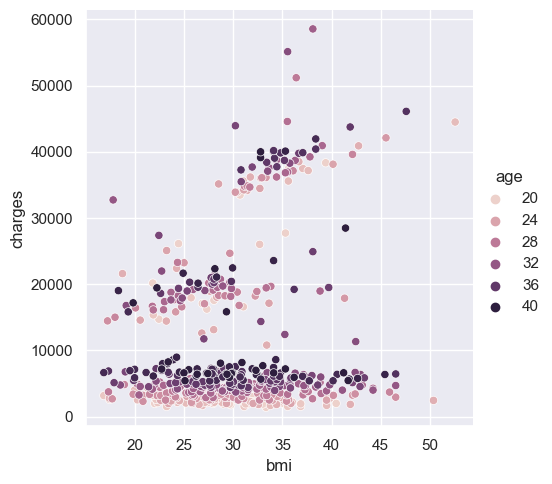

In [ ]:
sns.relplot(data=df_cleaned,x='bmi',y='charges',hue='age')

It can be observed that, in most cases, the charges remain constant even withh increase in BMI.

### BMI and Age against Charges

<seaborn.axisgrid.FacetGrid>

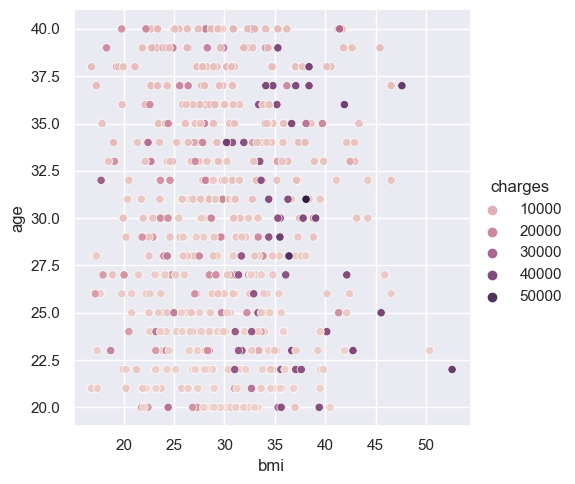

In [ ]:
sns.relplot(data=df_cleaned,x='bmi',y='age',hue='charges')

It can be observed that charges remain constant, in most cases, with increase in age, regardless of any changes in BMI.

### Age and Charges against BMI

<seaborn.axisgrid.FacetGrid>

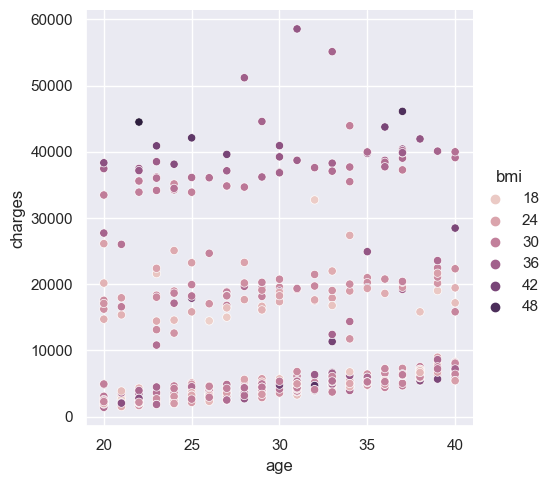

In [ ]:
sns.relplot(data=df_cleaned,x='age',y='charges',hue='bmi')

It can be observed that bmi remains constant with increase in age, although increase in BMI does not necessarily increase charges.

# Task 3: Method Chaining

In [ ]:
import project_functions2 as p2
clean_data = p2.load_and_process("../data/raw/raw_MC.csv")
display(clean_data)

This is the required data that I would like to analyse for my research question.


,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


Plot 1: The plot here shows that charges remain constant even with increase in BMI, in most cases.
Plot 2: The plot here shows that charges remain constant with increase in age, regardless of any changes in BMI.
Plot 3: The plot here shows that BMI remains constant with increase in age, although increase in BMI does not necessarily increase charges.


(<seaborn.axisgrid.FacetGrid>,
 <seaborn.axisgrid.FacetGrid>,
 <seaborn.axisgrid.FacetGrid>)

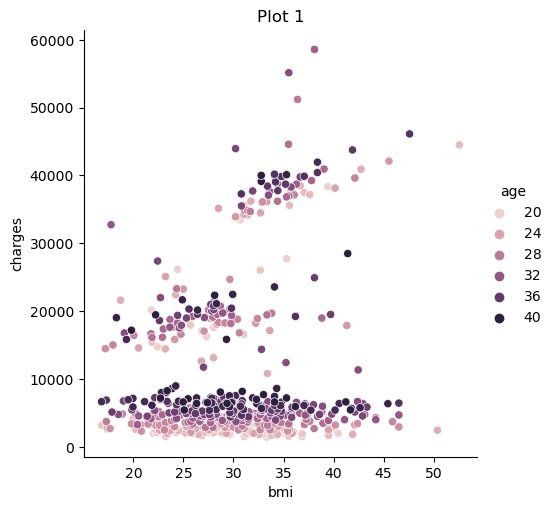

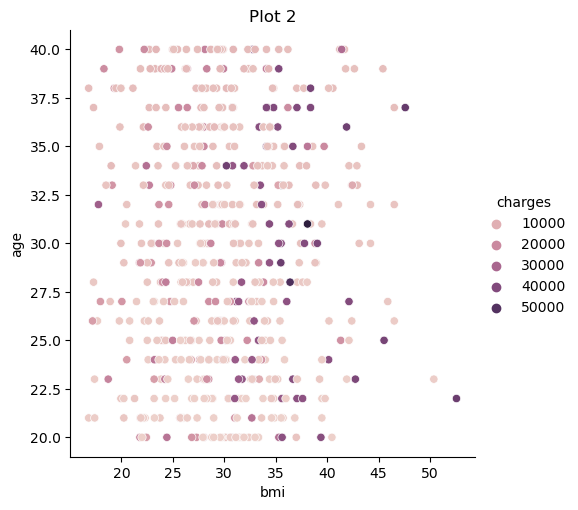

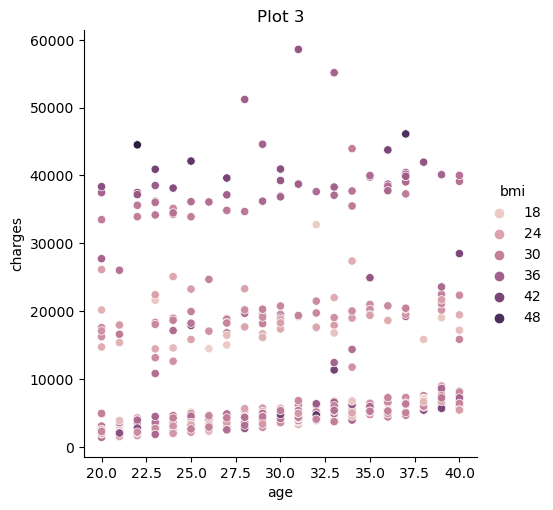

In [ ]:
p2.final_plots(clean_data)

# Task 4: Research Analysis Conclusion

I started with an interest in understanding the relationship between BMI and the medical insurance costs. However, I quickly realised I needed to add a limiting factor to localilse my data and infer good results. As a result, I then lookedd at the people aged between 20 and 40 to conduct my analysis. The reason I chose this age range because they are generally considered able adults who can work jobs.

To begin my analysis, I hypothesised three situations:
1) There is a **direct**, i.e. positive, relationship between BMI and charges.
2) There is an **indirect** relationship, i.e. negative, relationship between BMI and charges.
3) There is **no distinguishable** relationship solely between BMI and charges.

Upon conducting my EDA, I noticed that there were no patterns that were being followed between BMI and the medical insurance costs for the designated people. In most cases, the following happened:
1) Charges remained constant even with increase in BMI.
2) Charges remained constant with increase in age, regardless of changes in BMI.
3) BMI remained constant with increase in age.
4) Increase in BMI did not necessarily call for increase in charges.

Therefore, the conclusion to my research questions stnads that **there is no distinguishable relationship solely between BMI and charges**. This is possibly because many other factors in the original data, such as children, sex, smoker, and region, contribute to fluctuations in the medical insurance costs from person to person.